In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris_features = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_target = pd.Series(iris.target, name="name")
iris_target.head()

0    0
1    0
2    0
3    0
4    0
Name: name, dtype: int32

In [8]:
iris_combined = pd.concat([iris_features, iris_target], axis=1)
iris_combined.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris_combined.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
iris_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   name               150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
iris_combined.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


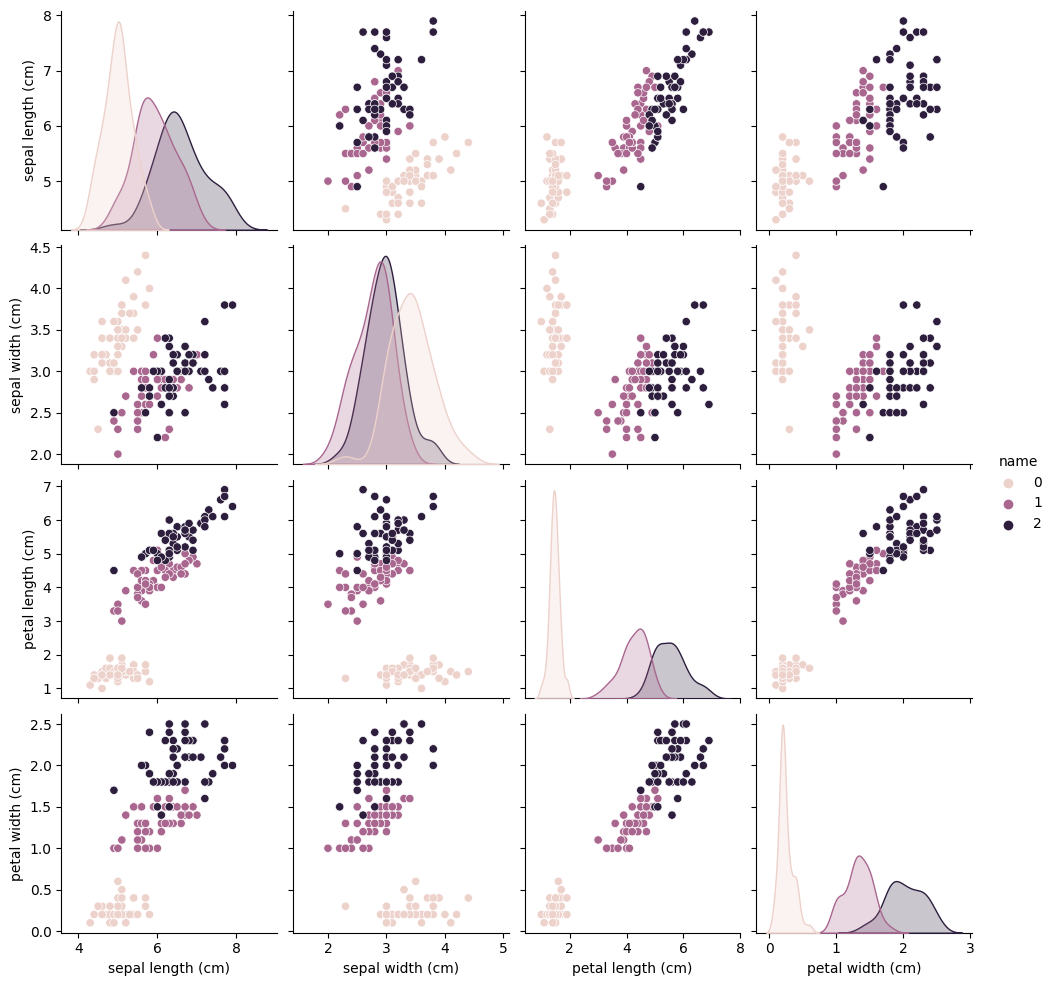

In [13]:
sns.pairplot(iris_combined, hue="name", kind="scatter")

In [15]:
# Training data and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size=0.2)

In [37]:
# Scaling parameters
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Define model - Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

In [19]:
# Fit data to random forest model

model = random_forest.fit(X_train, y_train)

In [20]:
# Use test data to test

predictions = model.predict(X_test)

In [23]:
# Accuracy check
from sklearn.metrics import accuracy_score

accuracy_score(predictions, y_test)*100

96.66666666666667

In [25]:
# Confusion Matrix to summarise classification made
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

<AxesSubplot: >

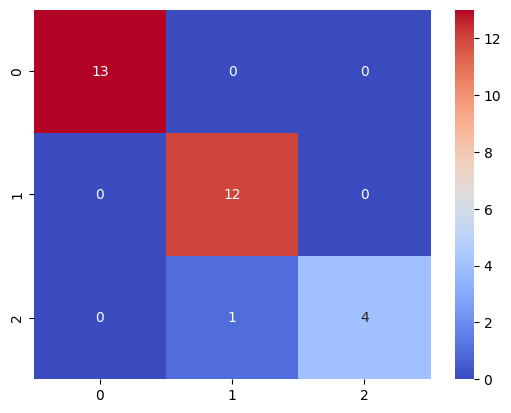

In [27]:
# HeatMap to represent the same

sns.heatmap(cm, cmap="coolwarm", annot=True)

In [29]:
# Saving the model to local for later use
import joblib

joblib.dump(model, "iris_classifier.sav")

['iris_classifier.sav']

In [78]:
joblib.dump(scaler, "iris_scalar.joblib")

['iris_scalar.joblib']